Aykırı Gözlemleri Yakalamak

In [229]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.select_dtypes('float64','int64')
df=df.dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [231]:
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

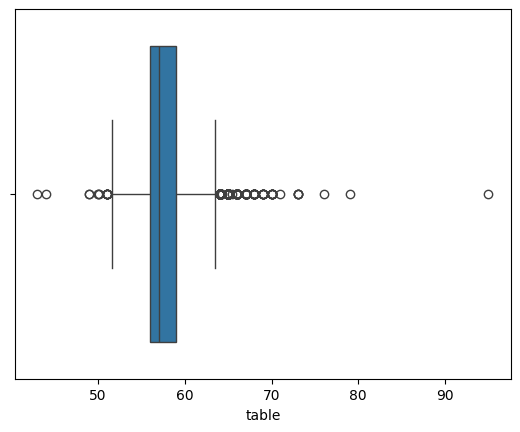

In [233]:
sns.boxplot(x=df.table)

In [235]:
Q1 = df_table.quantile(0.25) #Veri setinin ilk %25lik kısmı (küçükten büyüğe sıralanınca)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1

In [237]:
Q1

56.0

In [239]:
Q3

59.0

In [241]:
IQR

3.0

boxplot işe eşik değerleri hesaplayalım

In [244]:
alt_sinir = Q1 - 1.5 *IQR
ust_sinir = Q3 + 1.5 *IQR

In [246]:
alt_sinir

51.5

In [248]:
ust_sinir

63.5

51.5 ile 63.5 arasında olmayan değerler AYKIRI DEĞERlerdir..

In [251]:
(df_table<alt_sinir) | (df_table>ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [253]:
aykiri_tf = (df_table<alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [255]:
df_table[aykiri_tf]  #aykırı gözlemler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [257]:
df_table[aykiri_tf].index

Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701, 25179,
       26387, 33586, 35633, 45798, 46040, 47630],
      dtype='int64')

# #--------------------------------------------------------------------------------#


# Aykırı değer pobleminin çözümünü ele almak

### 1) Silmek

In [73]:
import pandas as pd
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [83]:
type(df_table)

pandas.core.frame.DataFrame

In [136]:
df_table.shape

(53940,)

In [138]:
df_table = pd.DataFrame(df_table)

In [140]:
t_df = df_table[~((df_table<(alt_sinir)) | (df_table>(ust_sinir))).any(axis=1)]
t_df.shape

(53335, 1)

### 2) Ortalama İle Doldurmak
#### Aykırı değerler tablodaki bütün değerlerin ortalaması ile doldurulur.

In [143]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.select_dtypes('float64','int64')
df=df.dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [145]:
df_table= df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [147]:
aykiri_tf.head() 

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [149]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [151]:
df_table.mean()

57.45718390804598

In [153]:
df_table[aykiri_tf].mean()

49.63125

In [162]:
df_table[aykiri_tf] = df_table.mean()

C:\Users\iremb\AppData\Local\Temp\ipykernel_15868\1977116534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] =df_table.mean()


In [164]:
df_table[aykiri_tf]

1515     57.442462
3238     57.442462
3979     57.442462
4150     57.442462
5979     57.442462
7418     57.442462
8853     57.442462
11368    57.442462
22701    57.442462
25179    57.442462
26387    57.442462
33586    57.442462
35633    57.442462
45798    57.442462
46040    57.442462
47630    57.442462
Name: table, dtype: float64

### 3) Baskılamak  
#### Değerler üst sınıra yakınsa üst sınıra, alt sınıra yakınsa alt sınıra eşitlenir.

In [201]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df.select_dtypes('float64','int64')
df=df.dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [203]:
df_table= df["table"]
df_table.head()
df_table = pd.DataFrame(df_table)

In [205]:
alt_sinir

51.5

In [207]:
ust_sinir

63.5

In [269]:
aykiri_tf_alt = (df_table<alt_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [271]:
aykiri_tf_ust = (df_table>ust_sinir)
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [279]:
df_table[aykiri_tf_alt] = alt_sinir
df_table[aykiri_tf_ust] = ust_sinir

C:\Users\iremb\AppData\Local\Temp\ipykernel_15868\2641098008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf_alt] = alt_sinir
C:\Users\iremb\AppData\Local\Temp\ipykernel_15868\2641098008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf_ust] = ust_sinir


<Axes: xlabel='table'>

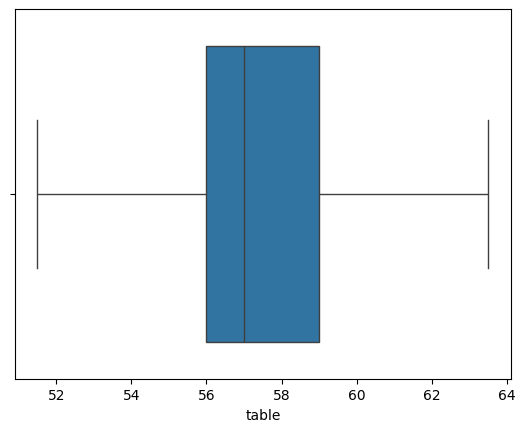

In [281]:
sns.boxplot(x=df_table)

In [283]:
df_table

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [287]:
df_table.min()

51.5

In [289]:
df_table.max()

63.5